<a href="https://colab.research.google.com/github/Tamizh2907/Projectcolor/blob/main/projectcolor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

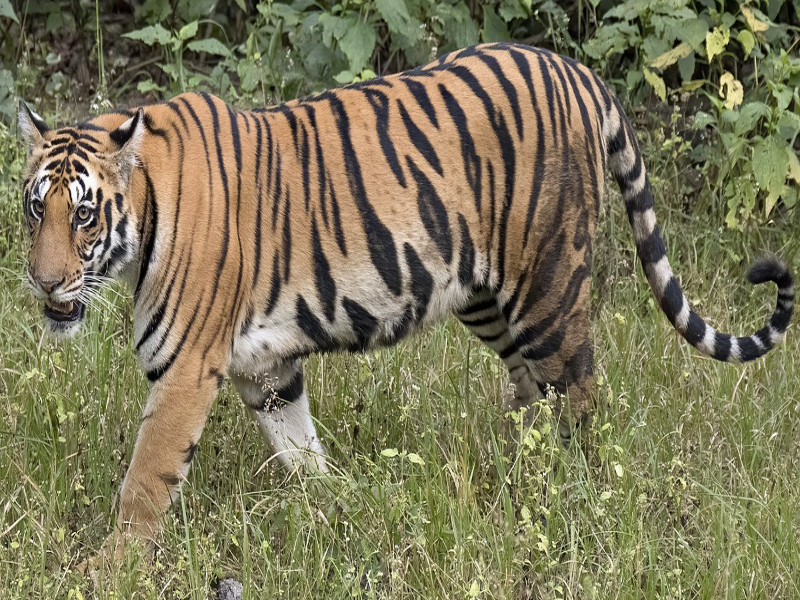

Detected Color (RGB): [19 27 29], Closest Color Name: Dark jungle green, Hex Code: #131b1d
Detected Color (RGB): [115 151 159], Closest Color Name: Light slate gray, Hex Code: #73979f
Detected Color (RGB): [137 172 192], Closest Color Name: Cadet grey, Hex Code: #89acc0
Detected Color (RGB): [56 83 84], Closest Color Name: Dark slate gray, Hex Code: #385354
Detected Color (RGB): [181 208 216], Closest Color Name: Pastel blue, Hex Code: #b5d0d8
Detected Color (RGB): [42 54 57], Closest Color Name: Medium jungle green, Hex Code: #2a3639
Detected Color (RGB): [ 72 107 108], Closest Color Name: Cadet, Hex Code: #486b6c
Detected Color (RGB): [ 93 130 131], Closest Color Name: AuroMetalSaurus, Hex Code: #5d8283


In [16]:
import cv2
import numpy as np
from scipy.spatial import distance
from google.colab.patches import cv2_imshow
import csv

# Load the input image
image = cv2.imread('/content/Walking_tiger_female.jpg')

# Preprocess the image (e.g., resize, convert to RGB)
# Example preprocessing steps: resizing and converting to RGB
image = cv2.resize(image, (800, 600))  # Resize the image
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
cv2_imshow(image)

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert pixel values to float32
pixels = np.float32(pixels)

# Define criteria and apply K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.42)
num_clusters = 8
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 and reshape back to image format
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display the segmented image
# cv2_imshow(segmented_image)
# cv2.waitKey(0)

# Function to find the closest color name based on hexadecimal color code
def closest_color_rgb(rgb_code):
    min_distance = float('inf')
    closest_color_name = None
    for color_name, color_rgb in color_names_rgb.items():
        d = distance.euclidean(rgb_code, color_rgb)
        if d < min_distance:
            min_distance = d
            closest_color_name = color_name
    return closest_color_name

# Function to convert RGB values to hexadecimal color code
def rgb_to_hex(rgb_code):
    return '#{0:02x}{1:02x}{2:02x}'.format(rgb_code[0], rgb_code[1], rgb_code[2])

# Define a list of color names and their corresponding RGB values
# Define a dictionary of color names and their corresponding RGB values

color_names_rgb = {}

# Read the CSV file with color data
csv_file = 'colorhexa_com.csv'

# Open the CSV file and read the data
with open(csv_file, mode='r') as file:
    reader = csv.reader(file)

    # Skip the header row if present
    next(reader, None)

    # Iterate over each row in the CSV file
    for row in reader:
        # Extract color name and RGB values from the row
        color_name = row[0].strip()
        red = int(row[2])
        green = int(row[3])
        blue = int(row[4])

        # Store the color name and RGB values in the dictionary
        color_names_rgb[color_name] = (red, green, blue)

# color_names_rgb = {
#     'Red': (255, 0, 0),
#     'Green': (0, 128, 0),
#     'Blue': (0, 0, 255),
#     'Yellow': (255, 255, 0),
#     'Cyan': (0, 255, 255),
#     'Magenta': (255, 0, 255),
#     'Orange': (255, 165, 0),
#     'Purple': (128, 0, 128),
#     'Brown': (165, 42, 42),
#     'Pink': (255, 192, 203),
#     'Teal': (0, 128, 128),
#     'Lime': (0, 255, 0),
#     'Olive': (128, 128, 0),
#     'Maroon': (128, 0, 0),
#     'Black': (0, 0, 0),
#     'White': (255, 255, 255),
#     'Gold': (255, 215, 0),
#     'Silver': (192, 192, 192),
#     'Gray': (128, 128, 128),
#     'Navy': (0, 0, 128),
#     'Sky Blue': (135, 206, 235),
#     'Turquoise': (64, 224, 208),
#     'Violet': (238, 130, 238),
#     'Crimson': (220, 20, 60),
#     'Lavender': (230, 230, 250),
#     'Indigo': (75, 0, 130),
#     'Beige': (245, 245, 220),
#     'Salmon': (250, 128, 114),
#     'Khaki': (240, 230, 140),
#     'Tomato': (255, 99, 71),
#     'Slate Gray': (112, 128, 144),
#     'Chocolate': (210, 105, 30),
#     'Ivory': (255, 255, 240),
#     'Peru': (205, 133, 63),
#     'Sienna': (160, 82, 45),
#     'Coral': (255, 127, 80),
#     'Dark Green': (0, 100, 0),
#     'Dark Blue': (0, 0, 139),
#     'Dark Red': (139, 0, 0),
#     'Dark Orange': (255, 140, 0),
#     'Dark Violet': (148, 0, 211),
#     'Dark Magenta': (139, 0, 139),
#     'Dark Cyan': (0, 139, 139),
#     'Dark Gray': (169, 169, 169),
#     'Dark Salmon': (233, 150, 122),
#     'Dark Khaki': (189, 183, 107),
#     'Dark Turquoise': (0, 206, 209),
#     'Dark Slate Gray': (47, 79, 79),
#     'Light Green': (144, 238, 144),
#     'Light Blue': (173, 216, 230),
#     'Light Red': (255, 182, 193),
#     'Light Orange': (255, 160, 122),
#     'Light Violet': (221, 160, 221),
#     'Light Magenta': (255, 0, 255),
#     'Light Cyan': (224, 255, 255),
#     'Light Gray': (211, 211, 211),
#     'Light Salmon': (255, 160, 122),
#     'Light Khaki': (240, 230, 140),
#     'Light Turquoise': (175, 238, 238),
#     'Light Slate Gray': (119, 136, 153),
# }


# Extract RGB codes of the detected colors and their corresponding color names
for center in centers:
    rgb_code = center
    closest_name = closest_color_rgb(rgb_code)
    hex_code = rgb_to_hex(rgb_code)
    print(f'Detected Color (RGB): {rgb_code}, Closest Color Name: {closest_name}, Hex Code: {hex_code}')